Welcome everyone to lab one. This worksheep will guide you to everything that you need including instructions, the questions and definitely the bonus questions for your extra scores. Before we start with anything, please fill in your information here so we can give you nice some nice scores later. 

- Member1:
- Member2: 
- Member3: 
- Member4: 

Please try to elaborate this exercise with the lectures from the first week. The goal of this lab is for you to enjoy mass spectrometry data much more. MS is absolutely an intrigueing technology. In other words, it is not that simple to understand it with in a few minutes but we are here to explore them all together. Nevertheless, we try to reduce several steps into just a simple exercise. 

## Intended learning outcomes (ILOs)

On completion of the lab, the student should be able to:

1. Demonstrate understandings and insights in mass spectrometry
2. Retrieve open access mass spectrometry data
3. Access organism proteome from database 
4. Identify the relevant issues of complexity in high-throughput data structure from mass spectrometry
5. Demonstrate capacity to store and handle high throughput data with efficiency 

## Let's start! 

We have created a simple exercise for you on <https://github.com/thanadol-git/bc_25>. Please try to follow it along with answering the questions here. The teachers will try to help you in the class so don't worry if it looks a bit difficult. We are always here to help. 

You may learn a bit about mass spectrometry from Fredrik. Now, we are touching a real dataset. First look at the SDRF file. Here is the [link](https://www.cell.com/cancer-cell/fulltext/S1535-6108(22)00274-4?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1535610822002744%3Fshowall%3Dtrue) to the main article.

## Q1. 
**What do you see in the SDRF file? How many samples are there?** 

Ans.

## Q2.
**What is PRIDE accession ID for this dataset? Summarise the experiment in a short paragraph (<100 words).**

Ans. 

## Q3. 
**What samples were used and located in the organism/s in this experiment?**

Ans.

## Q4.
**What is the model of the instrument? What is its set-up? Is it labelled or labelled-free quantification?**

Ans. 


In [1]:
# libraries 
import numpy as np
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
# sklearn

In [22]:
# Download the results 

## SDRF
sdrf = pd.read_csv('cell_metadata_scbc25.sdrf.tsv', sep='\t')
## DIANN report
diann_report = pd.read_csv('diannsummary/diann_report.unique_genes_matrix.tsv', sep='\t')


## Q5. 
**What do you see in the report file? What are the columns and the rows** 



In [14]:
# Dynamic range

# pivot longer of all column  except Genes as `samples`
diann_report_long = diann_report.melt(id_vars=['Genes'], var_name='Samples', value_name='Intensity')

diann_report_long.head()

,Genes,Samples,Intensity
0,A2M,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
1,AAAS,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
2,AACS,190529_5510_007ZV_00BL5_M03_S_1.mzML,642.702
3,AAGAB,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
4,AAK1,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN


In [15]:
n_samples = diann_report_long['Samples'].nunique()
print(n_samples)

61


In [16]:
# Count missing values for each genes
missing_values = diann_report_long.groupby('Genes')['Intensity'].apply(lambda x: x.isna().sum()).reset_index()
# rename Intensity to Missing
missing_values.rename(columns={'Intensity': 'Missing'}, inplace=True)
# remove Missing is zero
# missing_values = missing_values[missing_values['Missing'] > 0]
# sort by Missing   
missing_values.sort_values(by='Missing', ascending=False, inplace=True)
# reset index
missing_values.reset_index(drop=True, inplace=True)

# Calculate percentage of missing values
missing_values['Percentage'] = (missing_values['Missing'] / n_samples) * 100

missing_values


,Genes,Missing,Percentage
0,SPANXB1,60,98.360656
1,SAA1,60,98.360656
2,MGAM,60,98.360656
3,CALML5,60,98.360656
4,COCH,60,98.360656
...,...,...,...
4914,RPS7,0,0.000000
4915,CALU,0,0.000000
4916,RPS6,0,0.000000
4917,RPS5,0,0.000000


## Q5. 
**How many genes that are always being detected in this experiment?** 


In [ ]:
# Filter missing genes
# Use 50% rule
selected_genes = missing_values[missing_values['Percentage'] <= 50]['Genes'].tolist()
print(selected_genes)

# Filter diann_report_long for selected genes
diann_report_long_filtered = diann_report_long[diann_report_long['Genes'].isin(selected_genes)]

# impute missing values with 0
diann_report_long_filtered['Intensity'].fillna(0, inplace=True)


['SURF1', 'CYBRD1', 'RPE', 'TNKS', 'SRXN1', 'PHF2', 'DHRS1', 'GLIPR2', 'CDCA5', 'CRYBG1', 'ATXN2', 'TTYH3', 'PLGRKT', 'SERPINB1', 'NFATC2IP', 'DHTKD1', 'RFTN1', 'RAB11FIP5', 'TPM2', 'IGF2BP1', 'PTPRJ', 'GNB4', 'SEC24D', 'MEF2B', 'PDLIM2', 'NFKB1', 'STX17', 'ERAP2', 'PLIN2', 'KIF20A', 'F5', 'ANKHD1', 'TMEM126B', 'ZNF787', 'DCAF8', 'AAMP', 'EFL1', 'GCA', 'HIP1', 'LPCAT2', 'PTDSS2', 'FAM20B', 'LRRK1', 'ARL6IP4', 'RPS6KA3', 'LRRC34', 'CRAT', 'P3H3', 'CUSTOS', 'EIF2D', 'TGM2', 'DHX33', 'QPRT', 'NOM1', 'MFN1', 'PDSS2', 'SFN', 'ARHGDIB', 'PSMG2', 'GTF3C4', 'PDZD11', 'NOL3', 'UMODL1', 'SLC4A2', 'TRMT2A', 'TRMT6', 'RELL1', 'PRXL2A', 'SUDS3', 'SKIC2', 'SLC39A14', 'MEAK7', 'CCDC9', 'FILIP1L', 'MPHOSPH6', 'DCUN1D1', 'PHLDB1', 'MGST1', 'TMEM192', 'LUC7L', 'BTN3A3', 'TMEM33', 'CLASP1', 'PCCA', 'UBE2R2', 'ACAP2', 'APIP', 'DHRS7B', 'EHD2', 'VMA21', 'HMGA2', 'ZFAND1', 'LYPLAL1', 'PATL1', 'AP1M1', 'SMN1', 'KAT7', 'MYO6', 'COL4A2', 'SAP30', 'SMARCA1', 'NAGLU', 'EIPR1', 'LRRC8A', 'VPS72', 'CD276', 'MAN2A1

,Genes,Samples,Intensity
1,AAAS,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
3,AAGAB,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
4,AAK1,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
6,AAMP,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
7,AARS1,190529_5510_007ZV_00BL5_M03_S_1.mzML,9183.15


In [25]:
# Join with sdrf
dr_plot = diann_report_long_filtered.merge(sdrf, left_on='Samples', right_on='comment[data file]', how='left')

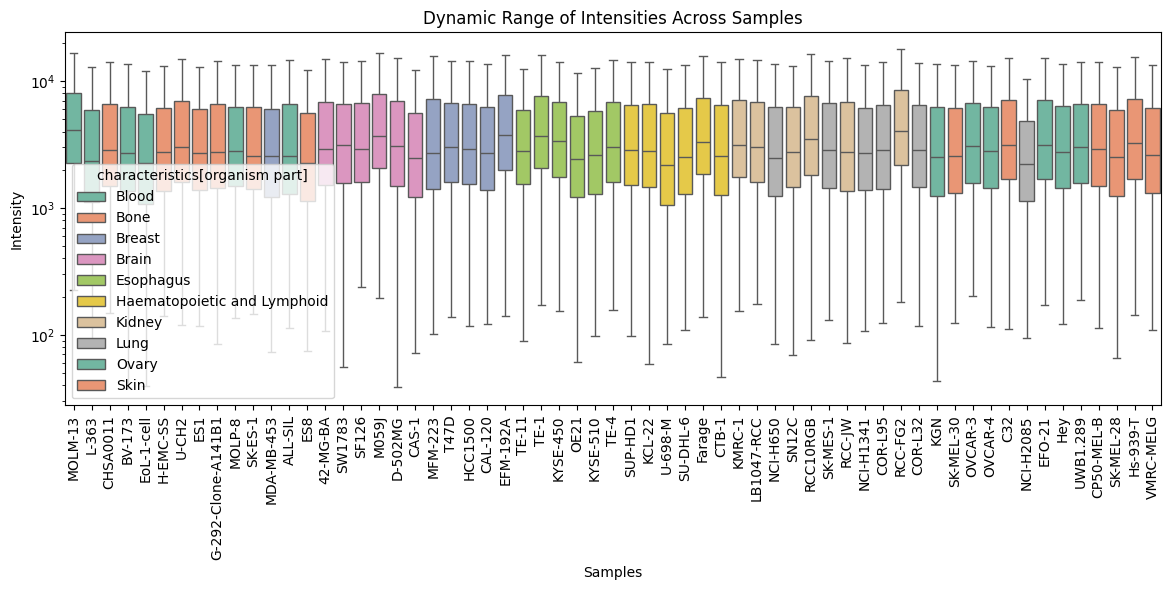

In [28]:
# Plot the dynamic range
plt.figure(figsize=(12, 6))
sns.boxplot(data=dr_plot, x='factor value[cell line]', y='Intensity', hue = 'characteristics[organism part]',
            palette='Set2', showfliers=False)
plt.xticks(rotation=90)
plt.title('Dynamic Range of Intensities Across Samples')
plt.xlabel('Samples')
plt.ylabel('Intensity')
plt.tight_layout()
# scale y log 10
plt.yscale('log')
# plt.savefig('diann_dynamic_range.png', dpi=300)
plt.show()

In [23]:
sdrf.head()

,source name,characteristics[organism],characteristics[organism part],characteristics[sampling site],characteristics[age],characteristics[developmental stage],characteristics[sex],characteristics[ancestry category],characteristics[disease],characteristics[cell line],...,comment[technical replicate],comment[instrument],comment[instrument identifier],comment[cleavage agent details],comment[modification parameters],comment[precursor mass tolerance],comment[fragment mass tolerance],comment[MS1 scan range],comment[MS2 scan range],factor value[cell line]
0,PXD030304-Sample-34,Homo sapiens,Blood,Peripheral blood,17Y,Juvenile,Male,Caucasian,T-cell childhood acute lymphocytic leukemia,ALL-SIL,...,1,NT=TripleTOF 6600;AC=MS:1002533,M03,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,ALL-SIL
1,PXD030304-Sample-66,Homo sapiens,Blood,Peripheral blood,45Y,Adult,Male,Caucasian,bcr-abl1 positive; Chronic myelogenous leukemia,BV-173,...,1,NT=TripleTOF 6600;AC=MS:1002533,M03,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,BV-173
2,PXD030304-Sample-1565,Homo sapiens,Blood,Peripheral blood,52Y,Adult,Male,Japanese,Plasma cell myeloma,MOLP-8,...,1,NT=TripleTOF 6600;AC=MS:1002533,M03,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLP-8
3,PXD030304-Sample-1563,Homo sapiens,Blood,Peripheral blood,20Y,Adult,Male,Japanese,Myelodysplastic syndrome,MOLM-13,...,1,NT=TripleTOF 6600;AC=MS:1002533,M02,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLM-13
4,PXD030304-Sample-1479,Homo sapiens,Blood,Peripheral blood,36Y,Adult,Female,Caucasian,Plasma cell myeloma,L-363,...,1,NT=TripleTOF 6600;AC=MS:1002533,M04,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,L-363
